In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import json
import seaborn as sns
import matplotlib

In [3]:
df = pd.read_csv('kickstarter_data_full.csv', dtype=None)

C:\Users\daria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Drop columns: 'index' and 'Unnamed' and set index column as id. 

In [4]:
df.drop(labels=['index','Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.set_index('id', inplace=True)

### Let's look at the data

In [6]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)

In [7]:
describe_data(df)

Data Types:
photo                           object
name                            object
blurb                           object
goal                           float64
pledged                        float64
state                           object
slug                            object
disable_communication             bool
country                         object
currency                        object
currency_symbol                 object
currency_trailing_code            bool
deadline                        object
state_changed_at                object
created_at                      object
launched_at                     object
staff_pick                        bool
backers_count                    int64
static_usd_rate                float64
usd_pledged                    float64
creator                         object
location                        object
category                        object
profile                         object
spotlight                         bool
urls         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 1454391034 to 1484954094
Data columns (total 66 columns):
photo                          20632 non-null object
name                           20632 non-null object
blurb                          20627 non-null object
goal                           20632 non-null float64
pledged                        20632 non-null float64
state                          20632 non-null object
slug                           20632 non-null object
disable_communication          20632 non-null bool
country                        20632 non-null object
currency                       20632 non-null object
currency_symbol                20632 non-null object
currency_trailing_code         20632 non-null bool
deadline                       20632 non-null object
state_changed_at               20632 non-null object
created_at                     20632 non-null object
launched_at                    20632 non-null object
staff_pick                     

In [9]:
df.head()

,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
id,,,,,,,,,,,,,,,,,,,,,
1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


### Look closely at all column names:

In [10]:
sorted(list(df.columns))

['DeadlineWeekend',
 'LaunchedTuesday',
 'SuccessfulBool',
 'TOPCOUNTRY',
 'USorGB',
 'backers_count',
 'blurb',
 'blurb_len',
 'blurb_len_clean',
 'category',
 'country',
 'create_to_launch',
 'create_to_launch_days',
 'created_at',
 'created_at_day',
 'created_at_hr',
 'created_at_month',
 'created_at_weekday',
 'created_at_yr',
 'creator',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'deadline',
 'deadline_day',
 'deadline_hr',
 'deadline_month',
 'deadline_weekday',
 'deadline_yr',
 'disable_communication',
 'friends',
 'goal',
 'is_backing',
 'is_starred',
 'launch_to_deadline',
 'launch_to_deadline_days',
 'launch_to_state_change',
 'launch_to_state_change_days',
 'launched_at',
 'launched_at_day',
 'launched_at_hr',
 'launched_at_month',
 'launched_at_weekday',
 'launched_at_yr',
 'location',
 'name',
 'name_len',
 'name_len_clean',
 'permissions',
 'photo',
 'pledged',
 'profile',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at'

 ### there are 3 columns dedicated to companies name, where name is actual name of the company, name_len is a number of words appear in the name


In [11]:
df[['name', 'name_len', 'name_len_clean']]

,name,name_len,name_len_clean
id,,,
1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,11.0,9.0
1655206086,Jump Start Kindergarten Toolkit,4.0,4.0
311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,8.0,8.0
859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",7.0,6.0
1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",7.0,7.0
808486483,Shadow School Board - Reforming Texas School B...,8.0,8.0
883246296,"Research in HIV prevention, treatment, and aid",7.0,5.0
242834615,Cardinal Investment Club,3.0,3.0
2079785043,V.I.P.-Architecture,1.0,1.0


### I've discovered lots of uninformative columns and duplicates. I need to choose with columns are useful and drop other.
For this aim I did a copy dataframe

In [12]:
df1 = df.copy()

### Look closer at all unclear columns and decide whether or not column useful for further analysis

In [13]:
df['state'].unique() # there are 5 states for the project

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [14]:
df['category'].unique() #

array(['Academic', 'Places', nan, 'Blues', 'Restaurants', 'Webseries',
       'Thrillers', 'Shorts', 'Web', 'Apps', 'Gadgets', 'Hardware',
       'Festivals', 'Plays', 'Musical', 'Flight', 'Spaces', 'Immersive',
       'Experimental', 'Comedy', 'Wearables', 'Sound', 'Software',
       'Robots', 'Makerspaces'], dtype=object)

In [15]:
df1[['currency', 'currency_trailing_code']] 
# check what 'currency_trailing_code' is, because it wasn't any describtion for this column. 
# I didn't understand what it is and decide to drop it.

,currency,currency_trailing_code
id,,
1454391034,USD,True
1655206086,USD,True
311581827,USD,True
859724515,USD,True
1613604977,EUR,False
808486483,USD,True
883246296,USD,True
242834615,USD,True
2079785043,EUR,False


### In the process, I'he found some columns that contain dict format, so lets look closer if where anything important

Inside 'creator' column I found that some creators have not only one startup. <br>

It can affect our prediction, so I've created a new column 'more_than_1_project' with next values: <br>

    0 - creator has made only one project <br>
    1 - creator has made more than 1 project

In [16]:
df1['creator'] = df1['creator'].apply(
    lambda creator: json.loads(creator))

In [17]:
creator_ids = df1['creator'].apply(
    lambda row: row['id']).value_counts()
more_than_1_project = creator_ids[creator_ids > 1].index

In [18]:
df1['more_than_1_project'] = df1['creator'].apply(
    lambda creator: int(creator['id'] in more_than_1_project))

Inside 'location' dict column I found unique location id, so I created new column 'location_id'

In [19]:
type(json.loads(df1['location'][1454391034]))
# there is an id for each location, might be interesting 
df1['location_id'] = df1['location'].apply(lambda loc: 
    json.loads(loc)['id'] if type(loc) == str else loc)
df1['location_id']

id
1454391034     2487952.0
1655206086     2414687.0
311581827      1398823.0
859724515      2368233.0
1613604977      663756.0
808486483      2430835.0
883246296      2384455.0
242834615      2367105.0
2079785043      667675.0
1624645868     2487796.0
1743130616       19344.0
429226406      2464592.0
2112786846      644347.0
1849446483     2358820.0
1569011636      418440.0
715603667      2459115.0
186321733      2430683.0
527974588        44418.0
802037657      2467861.0
88388947       2391585.0
1458256720    23417507.0
1984764148     2458833.0
234618344        32185.0
736237802       646099.0
1367940921        8775.0
1697034959      545801.0
133730080      2427422.0
127604132      2514815.0
1908241906       44418.0
1991872276     2487796.0
                 ...    
1166331042     2512682.0
1289025869     2487796.0
2114443038     2520897.0
758757126      2466256.0
1079398401     1103816.0
609212834      1103816.0
989622085      2367105.0
1580753310     2487889.0
120251226      2388929

### Time to drop all column that are not interesting in further analysis

In [20]:
df1 = df1.drop(axis=1, labels = [
    'photo', 'name', 'name_len', 
    'blurb', 'blurb_len', 'create_to_launch',
    'creator', 'currency_symbol', 'currency_trailing_code',
    'DeadlineWeekend', 'friends', 'is_backing',
    'is_starred', 'launch_to_deadline', 'launch_to_state_change',
    'LaunchedTuesday', 'location',
    'permissions', 'profile', 'slug',
    'source_url', 'staff_pick', 'state_changed_at', 'TOPCOUNTRY',
    'urls', 'USorGB'])
df1

,goal,pledged,state,disable_communication,country,currency,deadline,created_at,launched_at,backers_count,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,more_than_1_project,location_id
id,,,,,,,,,,,,,,,,,,,,,
1454391034,1500.0,0.0,failed,False,US,USD,2015-01-23 10:35:00,2014-11-29 22:55:57,2014-12-17 13:47:36,0,...,12,17,2014,13,17,36,36,0,0,2487952.0
1655206086,500.0,0.0,failed,False,US,USD,2015-05-01 16:13:22,2015-02-20 09:28:43,2015-03-02 16:13:22,0,...,3,2,2015,16,10,60,60,0,0,2414687.0
311581827,100000.0,120.0,failed,False,US,USD,2015-03-26 08:17:04,2015-01-24 00:08:06,2015-01-25 08:17:04,5,...,1,25,2015,8,1,60,60,0,0,1398823.0
859724515,5000.0,0.0,failed,False,US,USD,2014-10-06 00:41:17,2014-09-05 22:30:00,2014-09-06 00:41:17,0,...,9,6,2014,0,0,30,30,0,0,2368233.0
1613604977,3222.0,356.0,failed,False,DE,EUR,2016-06-27 12:00:00,2016-05-25 14:09:49,2016-05-26 05:57:27,17,...,5,26,2016,5,0,32,32,0,0,663756.0
808486483,13000.0,1136.0,failed,False,US,USD,2015-11-20 10:28:58,2015-10-19 07:24:42,2015-10-21 10:28:58,12,...,10,21,2015,10,2,30,30,0,0,2430835.0
883246296,50000.0,0.0,failed,False,US,USD,2015-05-29 22:12:26,2015-04-29 20:57:04,2015-04-29 22:12:26,0,...,4,29,2015,22,0,30,30,0,0,2384455.0
242834615,10000.0,0.0,failed,False,US,USD,2015-09-27 10:36:31,2015-08-13 09:22:19,2015-08-13 10:36:31,0,...,8,13,2015,10,0,45,45,0,0,2367105.0
2079785043,6000.0,153.0,failed,False,DE,EUR,2016-03-08 05:46:51,2016-02-05 10:50:03,2016-02-07 05:46:51,7,...,2,7,2016,5,1,30,30,0,0,667675.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 1454391034 to 1484954094
Data columns (total 66 columns):
photo                          20632 non-null object
name                           20632 non-null object
blurb                          20627 non-null object
goal                           20632 non-null float64
pledged                        20632 non-null float64
state                          20632 non-null object
slug                           20632 non-null object
disable_communication          20632 non-null bool
country                        20632 non-null object
currency                       20632 non-null object
currency_symbol                20632 non-null object
currency_trailing_code         20632 non-null bool
deadline                       20632 non-null object
state_changed_at               20632 non-null object
created_at                     20632 non-null object
launched_at                    20632 non-null object
staff_pick                     

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 1454391034 to 1484954094
Data columns (total 42 columns):
goal                           20632 non-null float64
pledged                        20632 non-null float64
state                          20632 non-null object
disable_communication          20632 non-null bool
country                        20632 non-null object
currency                       20632 non-null object
deadline                       20632 non-null object
created_at                     20632 non-null object
launched_at                    20632 non-null object
backers_count                  20632 non-null int64
static_usd_rate                20632 non-null float64
usd_pledged                    20632 non-null float64
category                       18743 non-null object
spotlight                      20632 non-null bool
name_len_clean                 20627 non-null float64
blurb_len_clean                20627 non-null float64
deadline_weekday            

In [23]:
df1[df1.duplicated()] # Are there are any duplicated rows?

,goal,pledged,state,disable_communication,country,currency,deadline,created_at,launched_at,backers_count,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,more_than_1_project,location_id
id,,,,,,,,,,,,,,,,,,,,,


In [24]:
print('Percentage of missing categories: ') 
round(len(df1['category'][df1['category'].isnull()]) / len(df1['category']) * 100, 2)

Percentage of missing categories: 


9.16

In [25]:
df1['category'].unique()

array(['Academic', 'Places', nan, 'Blues', 'Restaurants', 'Webseries',
       'Thrillers', 'Shorts', 'Web', 'Apps', 'Gadgets', 'Hardware',
       'Festivals', 'Plays', 'Musical', 'Flight', 'Spaces', 'Immersive',
       'Experimental', 'Comedy', 'Wearables', 'Sound', 'Software',
       'Robots', 'Makerspaces'], dtype=object)

In [26]:
df1['category'].replace(np.NaN, 'Unknown', inplace=True)

In [27]:
df1['category'].isnull().sum()

0

In [28]:
df1['name_len_clean'][df1['name_len_clean'].isna()]

id
272079457    NaN
1819655792   NaN
626888806    NaN
1773256696   NaN
470839570    NaN
Name: name_len_clean, dtype: float64

In [29]:
df[df1['name_len_clean'].isna()]['name']

id
272079457                                        N/A (Canceled)
1819655792                                       N/A (Canceled)
626888806               Star Wars Bluetooth Speakers (Canceled)
1773256696    OF Press - A WordPress Theme and Site Builder ...
470839570                                       TEST (Canceled)
Name: name, dtype: object

those missing names looks wierd and all of them were canceled, so I decide to delete those rows from the dataset

In [30]:
drop_rows = df1[df1['name_len_clean'].isna()].index

In [31]:
df1.drop(labels=drop_rows, axis=0, inplace=True)

In [32]:
print(len(df1))
print(len(df))

20627
20632


In [33]:
df1['blurb_len_clean'].isna().sum()

0

there are 45 Nan values in the column 'location_id', let's replace them with new location id = 0, means on the Earth

In [34]:
df1['location_id'].replace(np.NaN, 0, inplace=True)

In [35]:
df1['location_id'].isna().sum()

0

In [36]:
df1.columns[df1.dtypes == 'object']

Index(['state', 'country', 'currency', 'deadline', 'created_at', 'launched_at',
       'category', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday'],
      dtype='object')

### Descriptive analysis

In [37]:
df1.describe()

,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_yr,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,more_than_1_project,location_id
count,2.062700e+04,2.062700e+04,20627.000000,20627.000000,2.062700e+04,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,...,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,2.062700e+04
mean,9.400197e+04,2.139608e+04,183.708053,1.039360,2.091830e+04,5.292578,13.081204,6.707471,15.694478,2014.832550,...,6.541087,15.322199,2014.752073,12.416881,49.583313,34.718815,31.174625,0.291754,0.150288,3.173834e+06
std,1.335622e+06,1.205115e+05,1222.158106,0.230413,1.154851e+05,2.418168,3.283547,3.411277,9.027788,1.270495,...,3.379844,8.801012,1.261851,5.573344,111.106169,11.873524,14.277022,0.454580,0.357363,5.994252e+06
min,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,1.000000,2009.000000,...,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,3.000000,11.000000,4.000000,8.000000,2014.000000,...,4.000000,8.000000,2014.000000,9.000000,3.000000,30.000000,28.000000,0.000000,0.000000,1.099805e+06
50%,1.400000e+04,6.970000e+02,12.000000,1.000000,7.170000e+02,5.000000,13.000000,7.000000,15.000000,2015.000000,...,7.000000,15.000000,2015.000000,12.000000,14.000000,30.000000,30.000000,0.000000,0.000000,2.419862e+06
75%,5.000000e+04,5.954500e+03,63.000000,1.000000,6.004752e+03,7.000000,15.000000,10.000000,23.000000,2016.000000,...,9.000000,23.000000,2016.000000,16.000000,45.000000,40.000000,35.000000,1.000000,0.000000,2.477058e+06
max,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,14.000000,30.000000,12.000000,31.000000,2017.000000,...,12.000000,31.000000,2017.000000,23.000000,1754.000000,91.000000,91.000000,1.000000,1.000000,1.000000e+08


In [38]:
df1['state'].value_counts()

failed        11416
successful     6018
canceled       2455
live            508
suspended       230
Name: state, dtype: int64

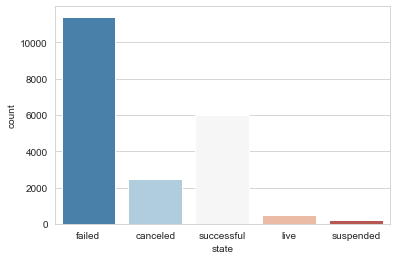

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='state',data=df1,palette='RdBu_r')
plt.savefig('state_distribution.png', bbox_inches='tight')

There is a column SuccessfulBool where 'successfull' state = 1, and other = 0. <br>
Should we use SuccessfulBool instead of the state column as a success rate?

In [40]:
df1['SuccessfulBool'].value_counts()

0    14609
1     6018
Name: SuccessfulBool, dtype: int64

In [41]:
df1.groupby(by=['SuccessfulBool', 'state']).size()

SuccessfulBool  state     
0               canceled       2455
                failed        11416
                live            508
                suspended       230
1               successful     6018
dtype: int64

## Number of Projects by Country

The distribution of data across countries is uneven, what to do?

In [42]:
state_by_country = df1.groupby(by=['country', 'state']).size()
state_by_country = pd.DataFrame(state_by_country)
state_by_country

0
country state           
AT      canceled       7
        failed        42
        live           5
        successful     9
AU      canceled      88
        failed       435
        live          21
        successful   110
        suspended     19
BE      canceled       6
        failed        37
        live           2
        successful     4
        suspended      2
CA      canceled     144
        failed       672
        live          30
        successful   235
        suspended     17
CH      canceled      12
        failed        55
        live           6
        successful    20
        suspended      1
DE      canceled      39
        failed       223
        live          24
        successful    88
        suspended      3
DK      canceled      18
...                  ...
MX      failed        25
        live          15
        successful    11
NL      canceled      35
        failed       214
        live           2
        successful    66
        suspended      5
NO      canceled      12
        failed        42
        successful     9
        suspended      1
NZ      canceled      14
        failed        65
        live           2
        successful    27
        suspended      3
SE      canceled      15
        failed        62
        live           3
        successful    16
SG      canceled       3
        failed        11
        live           5
        successful     6
US      canceled    1660
        failed      7668
        live         306
        successful  4362
        suspended    142

[95 rows x 1 columns]

In [43]:
country_agg = df1['country'].value_counts()

In [44]:
def get_visible(series):
    series_pct = (series / series.sum()) * 100
    series_pct_visible = series_pct[series_pct > 0.7]
    series_pct_visible['Other'] = 100 - series_pct_visible.sum()
    return series_pct_visible

country_agg_pct_visible = get_visible(country_agg)
labels = country_agg_pct_visible.index

In [45]:
def draw_pie(series):
    labels=[]
    for i in series.index:
        labels.append(i + ' : {:.2f}%'.format(series[i]))
    sizes=list(series)

    patches, texts = plt.pie(sizes, startangle=90, radius=2)
    plt.legend(patches, labels, loc="upper left", fontsize='x-large', bbox_to_anchor=(-0.5, 1.5), shadow=True)
    plt.savefig('country_distribution.png', bbox_inches='tight')
    plt.show()

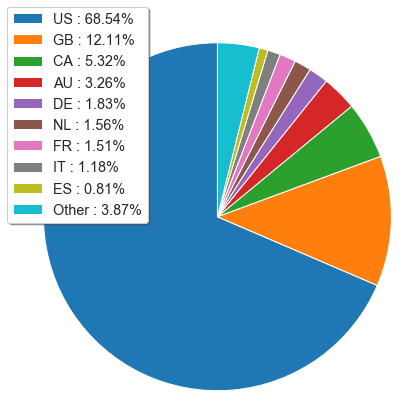

In [46]:
draw_pie(country_agg_pct_visible)

Since this is a US-based crowd-funding platform, it isn't suprising that >68% of the projects are US-based. In subsequent analyses, let's limit ourselves to US-based projects, since other countries are not sufficiently represented. Furthermore, we don't need to think about different currencies.

In [47]:
df_US = df1[df1['country'] == 'US'] #dataframe with only US projects

In [48]:
df_US.shape

(14138, 42)

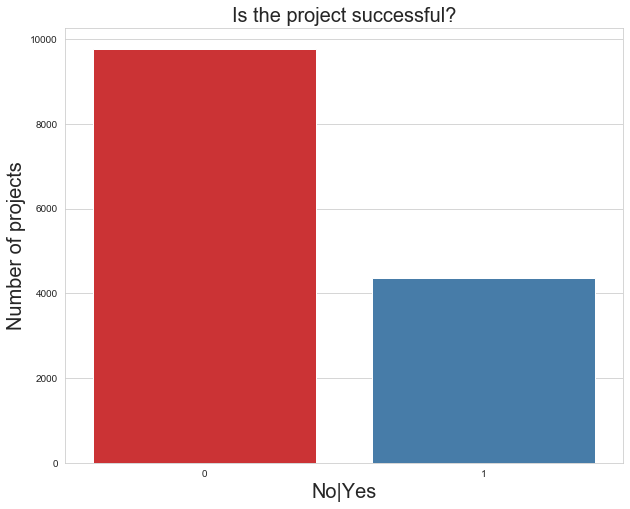

In [113]:
fig = plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.countplot(x='SuccessfulBool',data=df_US, palette='Set1')
plt.title('Is the project successful?',fontsize=20)
plt.ylabel('Number of projects', fontsize=20)
plt.xlabel('No|Yes', fontsize=20)
plt.savefig('Is_the_project_successful.png', bbox_inches='tight')
plt.show()

In [50]:
df_US['SuccessfulBool'].value_counts()

0    9776
1    4362
Name: SuccessfulBool, dtype: int64

In [51]:
sorted(list(df_US.columns)) #we don't need country column, because it is only one country now

['SuccessfulBool',
 'backers_count',
 'blurb_len_clean',
 'category',
 'country',
 'create_to_launch_days',
 'created_at',
 'created_at_day',
 'created_at_hr',
 'created_at_month',
 'created_at_weekday',
 'created_at_yr',
 'currency',
 'deadline',
 'deadline_day',
 'deadline_hr',
 'deadline_month',
 'deadline_weekday',
 'deadline_yr',
 'disable_communication',
 'goal',
 'launch_to_deadline_days',
 'launch_to_state_change_days',
 'launched_at',
 'launched_at_day',
 'launched_at_hr',
 'launched_at_month',
 'launched_at_weekday',
 'launched_at_yr',
 'location_id',
 'more_than_1_project',
 'name_len_clean',
 'pledged',
 'spotlight',
 'state',
 'state_changed_at_day',
 'state_changed_at_hr',
 'state_changed_at_month',
 'state_changed_at_weekday',
 'state_changed_at_yr',
 'static_usd_rate',
 'usd_pledged']

I'he deleated columns: <br>'country',<br> 'currency',<br> 'usd_pledged',<br> 'static_usd_rate' .

## I decided to sort all columns for analisys and prediction:

In [52]:
df_analytics = df_US[['category','goal','pledged', 'backers_count', 'blurb_len_clean', 'create_to_launch_days', 'created_at', 'disable_communication', 'location_id',
              'more_than_1_project', 'name_len_clean', 'spotlight', 'state', 'deadline', 'launched_at', 'SuccessfulBool' ]].copy()

In [53]:
df_prediction = df_US[['SuccessfulBool', 'goal', 'backers_count', 'create_to_launch_days', 'created_at_day', 'created_at_hr',
                      'created_at_month', 'created_at_weekday', 'created_at_yr', 'deadline_day', 'deadline_hr', 
                     'deadline_month', 'deadline_weekday', 'deadline_yr', 'disable_communication', 'launch_to_deadline_days','launch_to_state_change_days', 
                     'launched_at_hr', 'launched_at_month','launched_at_weekday', 'launched_at_yr', 'more_than_1_project', 'name_len_clean', 'pledged',
                      'spotlight', 'state_changed_at_day', 'state_changed_at_hr', 'state_changed_at_month', 'state_changed_at_weekday', 'state_changed_at_yr']].copy()

In [54]:
set(df1.columns).difference(set(df_analytics.columns).union(set(df_prediction.columns)))

{'country', 'currency', 'launched_at_day', 'static_usd_rate', 'usd_pledged'}

In [55]:
set(df_analytics.columns).difference(set(df_prediction.columns))

{'blurb_len_clean',
 'category',
 'created_at',
 'deadline',
 'launched_at',
 'location_id',
 'state'}

In [56]:
df_analytics.describe()

,goal,pledged,backers_count,blurb_len_clean,create_to_launch_days,location_id,more_than_1_project,name_len_clean,SuccessfulBool
count,1.413800e+04,1.413800e+04,14138.000000,14138.000000,14138.000000,1.413800e+04,14138.000000,14138.000000,14138.000000
mean,8.850266e+04,2.495234e+04,216.680648,13.015419,53.788301,3.199036e+06,0.159004,5.360588,0.308530
std,1.280835e+06,1.329102e+05,1422.852596,3.205254,119.842577,4.553004e+06,0.365693,2.397060,0.461903
min,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,5.000000e+03,3.700000e+01,2.000000,11.000000,4.000000,2.389876e+06,0.000000,4.000000,0.000000
50%,1.500000e+04,9.293300e+02,14.000000,13.000000,15.000000,2.450080e+06,0.000000,5.000000,0.000000
75%,5.000000e+04,7.385500e+03,75.000000,15.000000,49.000000,2.487610e+06,0.000000,7.000000,1.000000
max,1.000000e+08,6.225355e+06,105857.000000,30.000000,1754.000000,1.000000e+08,1.000000,14.000000,1.000000


## How does the expected money investment fit the amount of pledged USD?

In [57]:
def plot_scatter(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Money investment to desired amount")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set(xlim=(0, 1000000), ylim=(0, 1000000))
    ax.grid(which="both")
    plt.savefig('Money investment to desired amount.png', bbox_inches='tight', dpi=200)
    plt.show()
    
    return fig, ax

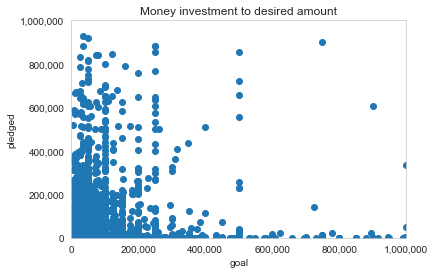

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x149839cd748>)

In [58]:
plot_scatter(df_analytics, 'goal' , 'pledged')

In [59]:
print('The mean of requested investment amount: ' + str(round(df_analytics['goal'].mean(), 2)))
print('The max of requested investment amount: ' + str(round(df_analytics['goal'].max(), 2)))
print('The std of requested investment amount: ' + str(round(df_analytics['goal'].std(), 2)))


The mean of requested investment amount: 88502.66
The max of requested investment amount: 100000000.0
The std of requested investment amount: 1280835.07


In [60]:
format(int(df_analytics['goal'].max()), ',')

'100,000,000'

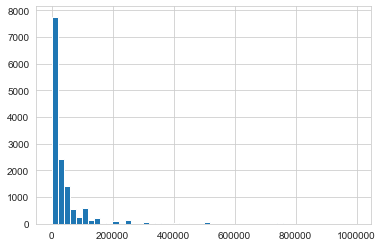

In [61]:
goals = df_analytics['goal']
plt.hist(goals[goals < 1000000], bins=50)
plt.show()

In [62]:
goal_less_20M = df_analytics['goal'][df_analytics['goal'] < 20000000]
pledged_less_20M = df_analytics['pledged'][df_analytics['pledged'] < 20000000]

In [63]:
diff = df_analytics['goal'] - df_analytics['pledged']
diff_df = pd.DataFrame({'diff': diff, 'goal' : df_analytics['goal']})
diff_df = diff_df[diff_df['diff'] < 1000000]

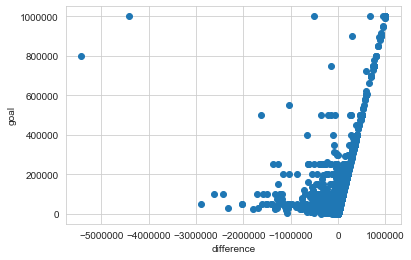

In [64]:
fig, ax = plt.subplots()
plt.scatter(diff_df['diff'], diff_df['goal'])
ax.set_xlabel('difference')
ax.set_ylabel('goal')
plt.show()

In [65]:
format(df_analytics['goal'].max(), ',')

'100,000,000.0'

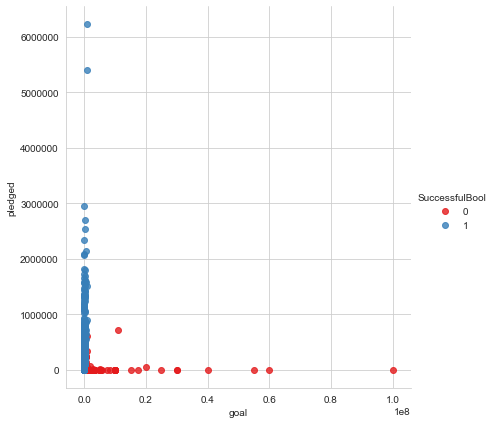

In [66]:
sns.set_style('whitegrid')
fg1 = sns.lmplot(x='goal',y='pledged',data=df_US, hue='SuccessfulBool',  #'coolwarm'
           palette='Set1',height=6,aspect=1,fit_reg=False)
plt.savefig('The more you want, the less you got.png', bbox_inches='tight')

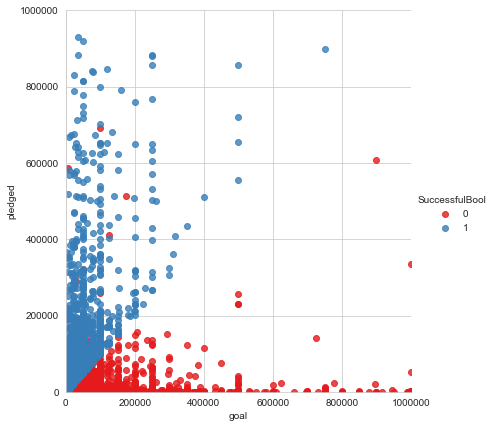

In [67]:
sns.set_style('whitegrid')
fg = sns.lmplot(x='goal',y='pledged',data=df_US, hue='SuccessfulBool',
           palette='Set1',height=6,aspect=1,fit_reg=False)
fg.set(xlim=(0, 1000000), ylim=(0, 1000000))
plt.savefig('The more you want, the less you got_zoomed.png', bbox_inches='tight')

We can make a number of observations here:

1. The more you ask for, the less your chance of success.
2. If you get even slightly less than what you ask for, you have a very high chance of failing.
3. If you get even slightly more than what you ask for, there is a high chance of success, but also still a slight chance of failure.
4. The goal/pledge ratio on Kickstarter can be used to predict startup success with high probability.

## How were success and failure distributed by category?

In [68]:
labels = df_analytics['category'].unique()
successful = df_analytics[df_analytics['SuccessfulBool'] == 1]['category'].value_counts()
failed = df_analytics[df_analytics['SuccessfulBool'] == 0]['category'].value_counts()

In [69]:
stacked = pd.DataFrame({'Successful': successful, 'Failed' : failed}, index=labels)

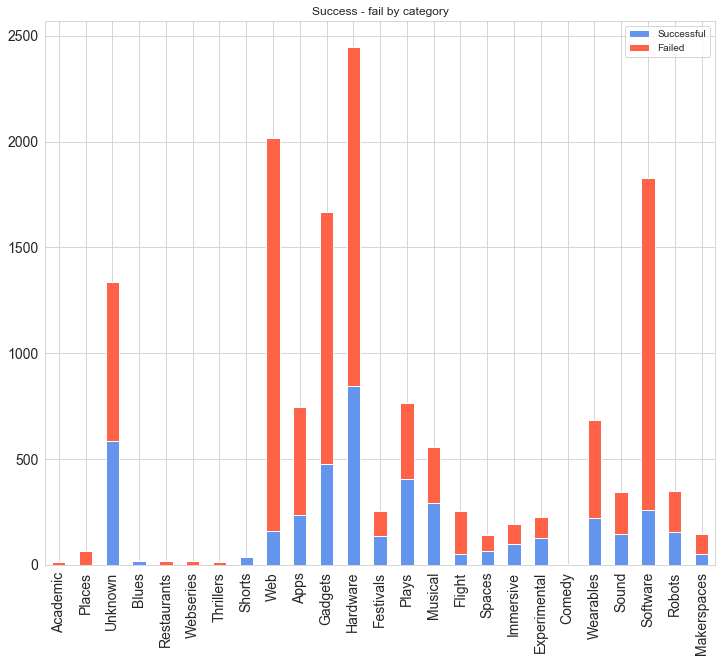

In [108]:
stacked.plot(kind='bar', stacked=True, color=['cornflowerblue', 'tomato'], figsize=(12,10), fontsize=14)
plt.title('Success - fail by category')
plt.savefig('category_distribution.png', bbox_inches='tight')

The graph shows that most of the projects belong to the IT industry, but more than half of them fail. <br>
At the same time, festivals, games and music projects are more successful.

### Experience matters?

In [71]:
def get_rate(cond1, cond2):
    return len(df_analytics[cond1 & cond2]) / len(df_analytics[cond1])

df_uniqueness_success_rate = pd.DataFrame({
    'Unique': {
        'Fail': get_rate(
            (df_analytics['more_than_1_project'] == 0),
            (df_analytics['SuccessfulBool'] == 0) ),
        'Success': get_rate(
            (df_analytics['more_than_1_project'] == 0),
            (df_analytics['SuccessfulBool'] == 1) )
    },
    'Nonunique': {
        'Fail': get_rate(
            (df_analytics['more_than_1_project'] == 1),
            (df_analytics['SuccessfulBool'] == 0) ),
        'Success': get_rate(
            (df_analytics['more_than_1_project'] == 1),
            (df_analytics['SuccessfulBool'] == 1) )
    }
})

In [72]:
df_uniqueness_success_rate

,Unique,Nonunique
Fail,0.718671,0.547598
Success,0.281329,0.452402


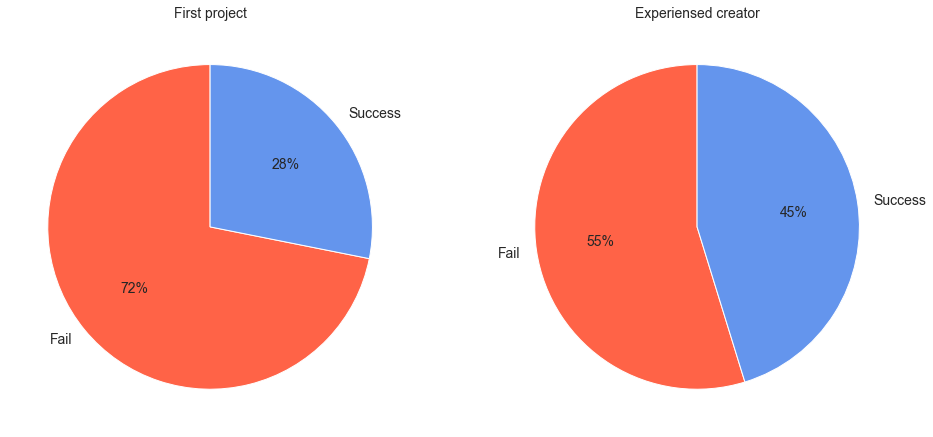

In [107]:
series_unique = df_uniqueness_success_rate['Unique']
serie_nonunique = df_uniqueness_success_rate['Nonunique']
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 9)
fontsize=14
ax[0].pie(series_unique, labels=series_unique.index, startangle = 90, textprops={'fontsize': fontsize}, autopct='%1.0f%%', colors=['tomato', 'cornflowerblue'])
ax[1].pie(serie_nonunique, labels=serie_nonunique.index, startangle = 90, textprops={'fontsize': fontsize}, autopct='%1.0f%%', colors=['tomato', 'cornflowerblue'])
ax[0].set_title('First project', fontsize=fontsize)
ax[1].set_title('Experiensed creator', fontsize=fontsize)
plt.savefig('experience.png', bbox_inches='tight')
plt.show()

The chance of project success increases by almost a quarter among experienced creators.

Lets code categories for prediction

In [74]:
#def code_cat (series):
    #return series.astype('category').cat.codes
                

In [75]:
#df_prediction['category_code'] = df_analytics['category'].astype('category').cat.codes
#df_prediction['category_code'] = code_cat(df_analytics['category'])

In [76]:
def add_cat_codes(df, list_of_col):
    for col in list_of_col:
        df[col + '_code'] = df[col].astype('category').cat.codes 

In [77]:
col_to_code = ['created_at_weekday', 'deadline_weekday','launched_at_weekday', 'state_changed_at_weekday']

In [78]:
add_cat_codes(df_prediction, col_to_code)

In [79]:
df_prediction.head(10)

,SuccessfulBool,goal,backers_count,create_to_launch_days,created_at_day,created_at_hr,created_at_month,created_at_weekday,created_at_yr,deadline_day,...,spotlight,state_changed_at_day,state_changed_at_hr,state_changed_at_month,state_changed_at_weekday,state_changed_at_yr,created_at_weekday_code,deadline_weekday_code,launched_at_weekday_code,state_changed_at_weekday_code
id,,,,,,,,,,,,,,,,,,,,,
1454391034,0,1500.0,0,17,29,22,11,Saturday,2014,23,...,False,23,10,1,Friday,2015,2,0,6,0
1655206086,0,500.0,0,10,20,9,2,Friday,2015,1,...,False,1,16,5,Friday,2015,0,0,1,0
311581827,0,100000.0,5,1,24,0,1,Saturday,2015,26,...,False,26,8,3,Thursday,2015,2,4,3,4
859724515,0,5000.0,0,0,5,22,9,Friday,2014,6,...,False,6,0,10,Monday,2014,0,1,2,1
808486483,0,13000.0,12,2,19,7,10,Monday,2015,20,...,False,20,10,11,Friday,2015,1,0,6,0
883246296,0,50000.0,0,0,29,20,4,Wednesday,2015,29,...,False,29,22,5,Friday,2015,6,0,6,0
242834615,0,10000.0,0,0,13,9,8,Thursday,2015,27,...,False,27,10,9,Sunday,2015,4,3,4,3
1624645868,0,15000.0,0,1,1,9,11,Sunday,2015,2,...,False,2,17,12,Wednesday,2015,3,6,1,6
429226406,0,10000.0,10,39,22,10,3,Tuesday,2016,30,...,False,30,7,6,Thursday,2016,5,4,3,4


In [80]:
sorted(df_prediction.columns)

['SuccessfulBool',
 'backers_count',
 'create_to_launch_days',
 'created_at_day',
 'created_at_hr',
 'created_at_month',
 'created_at_weekday',
 'created_at_weekday_code',
 'created_at_yr',
 'deadline_day',
 'deadline_hr',
 'deadline_month',
 'deadline_weekday',
 'deadline_weekday_code',
 'deadline_yr',
 'disable_communication',
 'goal',
 'launch_to_deadline_days',
 'launch_to_state_change_days',
 'launched_at_hr',
 'launched_at_month',
 'launched_at_weekday',
 'launched_at_weekday_code',
 'launched_at_yr',
 'more_than_1_project',
 'name_len_clean',
 'pledged',
 'spotlight',
 'state_changed_at_day',
 'state_changed_at_hr',
 'state_changed_at_month',
 'state_changed_at_weekday',
 'state_changed_at_weekday_code',
 'state_changed_at_yr']

In [81]:
df_prediction.drop(col_to_code, axis=1, inplace=True)

In [82]:
df_prediction.head(10)

,SuccessfulBool,goal,backers_count,create_to_launch_days,created_at_day,created_at_hr,created_at_month,created_at_yr,deadline_day,deadline_hr,...,pledged,spotlight,state_changed_at_day,state_changed_at_hr,state_changed_at_month,state_changed_at_yr,created_at_weekday_code,deadline_weekday_code,launched_at_weekday_code,state_changed_at_weekday_code
id,,,,,,,,,,,,,,,,,,,,,
1454391034,0,1500.0,0,17,29,22,11,2014,23,10,...,0.0,False,23,10,1,2015,2,0,6,0
1655206086,0,500.0,0,10,20,9,2,2015,1,16,...,0.0,False,1,16,5,2015,0,0,1,0
311581827,0,100000.0,5,1,24,0,1,2015,26,8,...,120.0,False,26,8,3,2015,2,4,3,4
859724515,0,5000.0,0,0,5,22,9,2014,6,0,...,0.0,False,6,0,10,2014,0,1,2,1
808486483,0,13000.0,12,2,19,7,10,2015,20,10,...,1136.0,False,20,10,11,2015,1,0,6,0
883246296,0,50000.0,0,0,29,20,4,2015,29,22,...,0.0,False,29,22,5,2015,6,0,6,0
242834615,0,10000.0,0,0,13,9,8,2015,27,10,...,0.0,False,27,10,9,2015,4,3,4,3
1624645868,0,15000.0,0,1,1,9,11,2015,2,17,...,0.0,False,2,17,12,2015,3,6,1,6
429226406,0,10000.0,10,39,22,10,3,2016,30,7,...,826.0,False,30,7,6,2016,5,4,3,4


In [83]:
cormat = df_prediction.corr()
round(cormat,2)

,SuccessfulBool,goal,backers_count,create_to_launch_days,created_at_day,created_at_hr,created_at_month,created_at_yr,deadline_day,deadline_hr,...,pledged,spotlight,state_changed_at_day,state_changed_at_hr,state_changed_at_month,state_changed_at_yr,created_at_weekday_code,deadline_weekday_code,launched_at_weekday_code,state_changed_at_weekday_code
SuccessfulBool,1.00,-0.03,0.19,0.00,-0.00,0.01,0.00,-0.08,-0.01,-0.01,...,0.24,1.00,-0.01,-0.01,0.04,-0.09,0.01,0.01,0.04,-0.01
goal,-0.03,1.00,0.00,-0.01,0.00,-0.00,0.00,0.01,-0.01,0.00,...,0.01,-0.03,-0.01,0.00,0.00,0.01,0.01,-0.00,-0.01,-0.00
backers_count,0.19,0.00,1.00,0.03,-0.00,-0.01,0.00,-0.02,-0.01,-0.04,...,0.75,0.19,-0.01,-0.03,0.01,-0.01,0.00,-0.00,0.05,-0.00
create_to_launch_days,0.00,-0.01,0.03,1.00,0.00,-0.00,0.00,-0.17,0.01,-0.04,...,0.03,0.00,-0.00,-0.04,0.03,0.06,0.00,-0.01,0.03,-0.01
created_at_day,-0.00,0.00,-0.00,0.00,1.00,0.00,-0.02,-0.02,0.09,-0.01,...,-0.00,-0.00,0.08,-0.01,-0.01,-0.01,-0.00,0.00,-0.01,0.00
created_at_hr,0.01,-0.00,-0.01,-0.00,0.00,1.00,-0.01,-0.02,0.01,0.11,...,-0.03,0.01,0.01,0.10,-0.02,-0.02,0.01,0.02,-0.01,0.01
created_at_month,0.00,0.00,0.00,0.00,-0.02,-0.01,1.00,-0.19,-0.01,-0.00,...,-0.00,0.00,-0.00,-0.00,0.28,-0.04,0.01,0.01,0.01,0.01
created_at_yr,-0.08,0.01,-0.02,-0.17,-0.02,-0.02,-0.19,1.00,0.00,-0.03,...,-0.00,-0.08,0.00,-0.03,-0.08,0.94,-0.01,-0.00,0.03,0.01
deadline_day,-0.01,-0.01,-0.01,0.01,0.09,0.01,-0.01,0.00,1.00,0.04,...,-0.01,-0.01,0.88,0.04,0.01,-0.01,-0.01,0.00,0.00,0.00
deadline_hr,-0.01,0.00,-0.04,-0.04,-0.01,0.11,-0.00,-0.03,0.04,1.00,...,-0.05,-0.01,0.03,0.88,-0.01,-0.04,-0.00,0.01,-0.01,0.00


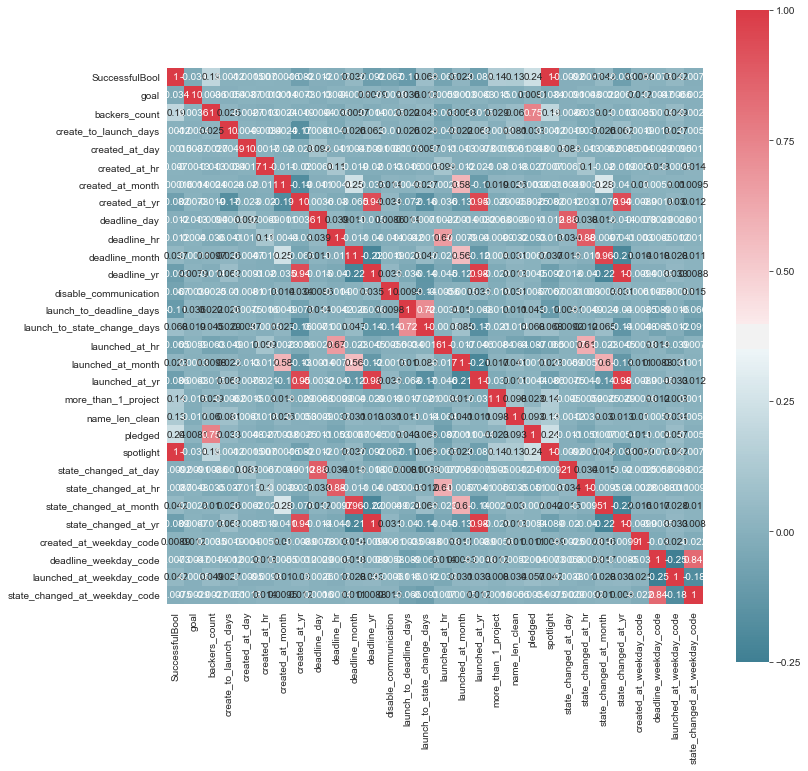

In [84]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_prediction.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)

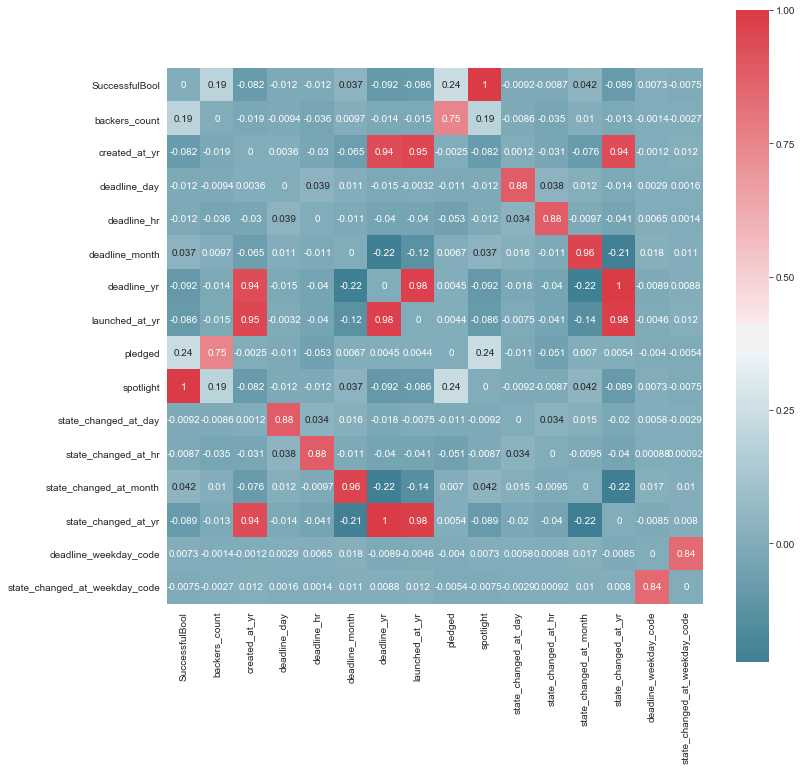

In [85]:
np.fill_diagonal(cormat.values, 0)
corcols = ((cormat >= 0.75)).any()
highcormat = cormat.loc[corcols, corcols]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(highcormat, mask=np.zeros_like(highcormat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)

By looking at the heatmap I see strong correlation between spotlight and SuccessBool equal to 1, it can affect on the overfitting the model, so better to drop it. Same situation with column 'state_changed_at_yr'

In [86]:
df_prediction.drop(['spotlight', 'state_changed_at_yr',
                    'launched_at_yr', 'deadline_yr', 'state_changed_at_month',
                    'state_changed_at_hr', 'state_changed_at_day', 
                    'backers_count', 'state_changed_at_weekday_code'], axis=1, inplace=True)

ValueError: zero-size array to reduction operation minimum which has no identity

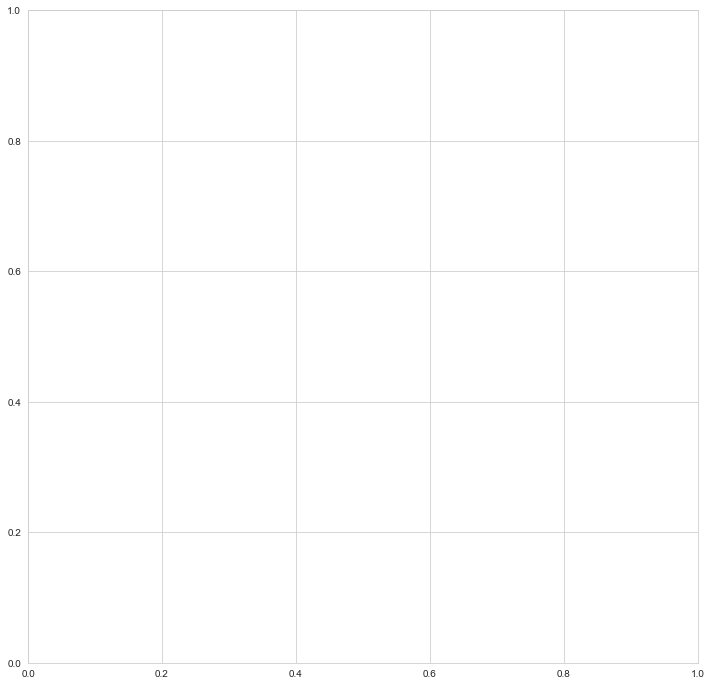

In [87]:
cormat = df_prediction.corr() #code is detecting high-corr columns + diagonal fills 0 
round(cormat,2)
np.fill_diagonal(cormat.values, 0)
corcols = ((cormat >= 0.75)).any()
highcormat = cormat.loc[corcols, corcols]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(highcormat, mask=np.zeros_like(highcormat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_prediction.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)

## Logistic Regression model fit and prediction

In [114]:
from sklearn.model_selection import train_test_split

train = df_prediction
X_train, X_test, y_train, y_test = train_test_split(train.drop('SuccessfulBool', axis=1),
                                                    train['SuccessfulBool'], test_size=0.30, random_state=112)

In [115]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

9896
4242
(9896, 20)
(4242, 20)


In [116]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [117]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
print("The intercept term of the logistic model:", lm.intercept_)

The intercept term of the logistic model: [-4.24324711e-08]


C:\Users\daria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
print("The coefficients of the logistic model:", lm.coef_)

The coefficients of the logistic model: [[-1.81829022e-04  7.85039519e-05  1.62475834e-06  8.24341319e-07
  -3.19830966e-07 -8.82902858e-05 -3.70211752e-06  1.67292555e-07
   3.26024681e-06 -4.22236655e-07 -4.03574877e-05  3.16452919e-05
  -6.72329862e-06  2.26391234e-06  6.32980126e-07  5.31350046e-06
   1.97124324e-04  2.55050224e-07  1.25578180e-06  3.37963384e-07]]


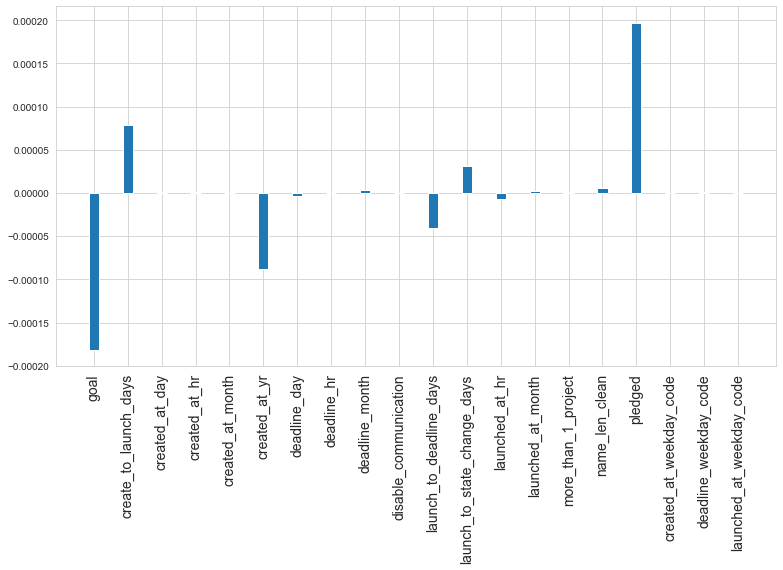

In [119]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_train.columns, lm.coef_[0], width=0.3)
plt.xticks(rotation = 90, fontsize=14)
plt.savefig('lm_coef.png', bbox_inches='tight')
plt.show()

In [120]:
prediction = lm.predict(X_test)
lm.score(X_test, y_test)
class_report = classification_report(y_test,prediction)

In [121]:
print(class_report)
print("R-squared value of predictions:",round(metrics.r2_score(y_test,prediction), 3))
plt.savefig('prediction.png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2946
           1       0.97      0.69      0.81      1296

    accuracy                           0.90      4242
   macro avg       0.92      0.84      0.87      4242
weighted avg       0.91      0.90      0.89      4242

R-squared value of predictions: 0.519


<Figure size 432x288 with 0 Axes>